In [2]:
import pandas as pd

model_results = pd.read_excel('best_models_results.xlsx')
model_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   T                180 non-null    int64  
 1   window_size      180 non-null    int64  
 2   hidden_dim       180 non-null    int64  
 3   num_layers       180 non-null    int64  
 4   best_val_loss    180 non-null    float64
 5   best_model_path  180 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.6+ KB


In [3]:
# 按照 best_val_loss 进行排序
model_results.sort_values(by='best_val_loss', inplace=True)
model_results.reset_index(drop=True, inplace=True)
model_results.head(10)

,T,window_size,hidden_dim,num_layers,best_val_loss,best_model_path
0,30,120,70,9,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
1,30,120,50,3,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
2,30,120,50,9,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
3,30,120,30,3,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
4,30,120,70,5,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
5,30,120,30,9,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
6,30,120,70,3,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
7,30,120,50,5,0.000001,lstm_models\best_lstm_model_T30_window120_hidd...
8,30,120,30,5,0.000002,lstm_models\best_lstm_model_T30_window120_hidd...
9,30,60,30,3,0.000002,lstm_models\best_lstm_model_T30_window60_hidde...


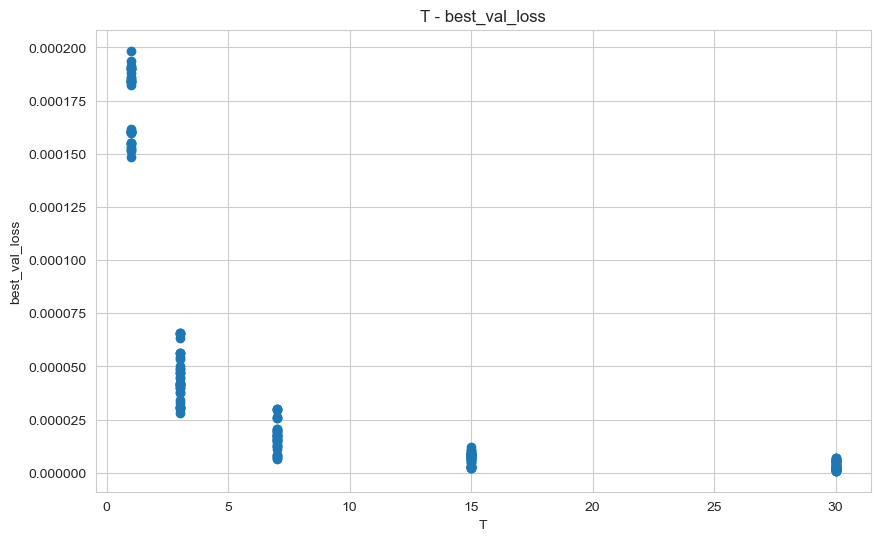

In [7]:
# 可视化分析T与best_val_loss的关系
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model_results['T'], model_results['best_val_loss'], 'o')
plt.xlabel('T')
plt.ylabel('best_val_loss')
plt.title('T - best_val_loss')
plt.show()

In [13]:
from data.get_data import get_common_data

data = get_common_data('SHSE.510300', '2008-01-01', '2021-01-01', 1)

# 计算data最后一列的均值
data['avg_daily_return_1'].mean()

# 计算方差
data['avg_daily_return_1'].var()

0.00024390700955947373

In [14]:
model_results['best_valLoss%var'] = model_results['best_val_loss'] / data['avg_daily_return_1'].var()

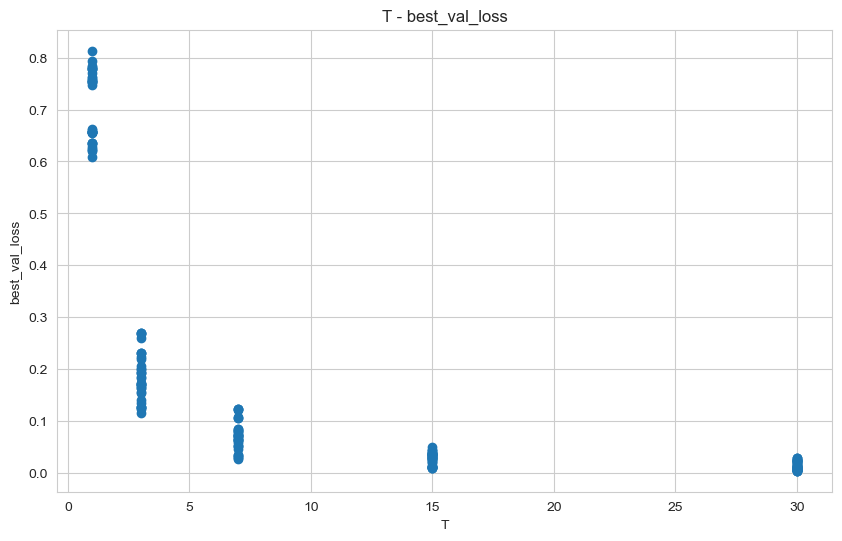

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(model_results['T'], model_results['best_valLoss%var'], 'o')
plt.xlabel('T')
plt.ylabel('best_val_loss')
plt.title('T - best_val_loss')
plt.show()